In [11]:
import pandas
from loguru import logger
import ndf.download
from ndf.datamining import datamining
import warnings
import sys
import pandas as pd

warnings.simplefilter(action='ignore', category=FutureWarning)

log_level = 'ERROR'
logger.add(sys.stderr, format="{time} {level} {message}", filter="my_module", level=log_level)
# logger.add(sys.stdout, colorize=True, format="<green>{time}</green> <level>{message}</level>")
logger.add("ndfdownload.log", rotation="30 MB", level=log_level)

4

In [12]:
from datetime import datetime

a = datetime.now()
a.date()

datetime.date(2023, 5, 30)

In [13]:
logger.remove()

In [14]:
d = ndf.download.download()
d.download_all()

bgc erro
tradition ok
prebontullet ok
gfi erro


In [15]:
mining = datamining()

In [16]:
tulletprebon = mining.tulletprebon_calcs()
tulletprebon

,Total for human,Volume
Class,,
BMF1,537.9M,537900000
BMF2,334M,334000000
LONGER,30M,30000000
PTAX,1M,1000000
TOMPTAX,175M,175000000
TOTAL,1.53B,1527400000
XP,449.5M,449500000


In [17]:
bgc = mining.bgc_calcs()
bgc

In [18]:
tradition = mining.tradition_calcs()
tradition

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,Total for human,Volume
Class,,
TOTAL,0,0


In [19]:
gfi = mining.gfi_calcs()
gfi

In [20]:
tulletprebon['source'] = 'TulletPrebon'
tradition['source'] = 'Tradition'
bgc['source'] = 'bgc'
gfi['source'] = 'gfi'

TypeError: 'NoneType' object does not support item assignment

In [ ]:
tradition

In [ ]:
pd.DataFrame({'Class': ['TOTAL'], 'Total for human': [0], 'Volume': [0]}).set_index('Class')

In [ ]:
df_result = pd.concat([tulletprebon, tradition, bgc, gfi])
df_result

In [ ]:
df_totals = df_result.query('Class == "TOTAL"')
df_totals

In [ ]:
df_totals.groupby(['Class']).sum()

In [ ]:
from numerize import numerize

market_total = df_totals.sum()['Volume']
market_total = numerize.numerize(float(market_total))
market_total

In [ ]:
summary = mining.market_summary()
summary

In [ ]:
market_total = mining.market_total()
market_total

In [ ]:
import matplotlib.pyplot as plt

market_total = mining.market_total()
summary = mining.market_summary()

fig = plt.figure(figsize=(5, 6))
plt.pie(summary['Volume'], labels=summary['source'], autopct='%1.0f%%')
plt.title(f'NDF Market Summary - Total ${market_total}')
plt.savefig('pie.png', dpi=fig.dpi, bbox_inches='tight')
# plt.show()


In [21]:
mining.market_total()

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


'1.53B'

In [22]:
mining.market_summary()

C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


,Total for human,Volume,source
Class,,,
TOTAL,1.53B,1527400000,TulletPrebon
TOTAL,0,0,Tradition
TOTAL,0,0,gfi
TOTAL,0,0,gfi


C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\souzacle\PycharmProjects\ndfutil\venv\lib\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


True

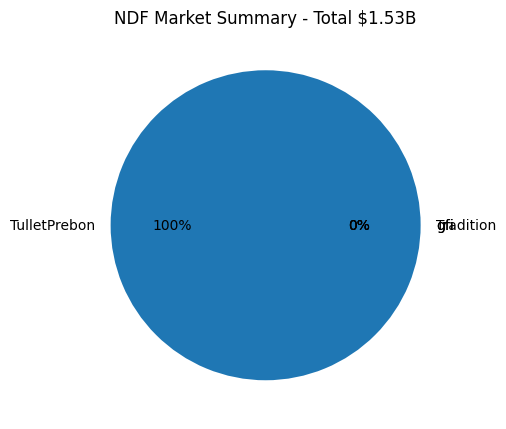

In [23]:
mining.generate_chart()